## Introduction

In this mission, we'll learn a couple other string cleaning tasks such as:

* Finding specific strings or substrings in columns
* Extracting substrings from unstructured data
* Removing strings or substrings from a series

The [economic dataset](https://www.kaggle.com/worldbank/world-development-indicators/version/2) are from the World Bank.

* `ShortName` - Name of the country
* `Region` - The region the country belongs to
* `IncomeGroup` - The income group the country belongs to, based on Gross National Income (GNI) per capita
* `CurrencyUnit` - Name of country's currency
* `SourceOfMostRecentIncomeAndExpenditureData` - The name of the survey used to collect the income and expenditure data
* `SpecialNotes` - Contains any miscellaneous notes about the data

In [1]:
import pandas as pd

In [2]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")

world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}


In [3]:
happiness2015['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [4]:
world_dev['ShortName'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech Republic', "Dem. People's Rep. Korea",
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only

In [5]:
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')

In [6]:
happiness2015.shape

(158, 12)

In [7]:
merged.shape

(158, 43)

In [8]:
world_dev.shape

(247, 31)

In [9]:
merged.rename(col_renaming, axis=1, inplace=True)

## Using Apply to Transform Strings

In [10]:
def extract_last_word(element):
    return str(element).split()[-1]

In [12]:
merged['CurrencyUnit'].apply(extract_last_word)

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       nan
156     franc
157     franc
Name: CurrencyUnit, Length: 158, dtype: object

In [13]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [14]:
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

## Vectorized String Methods Overview


| <font size=4>Method  </font>| <font size=4> Description </font>|
|:---------:|:-----------:|
|Series.str.split()|Splits each element in the Series. |
|Series.str.strip() |Strips whitespace from each string in the Series. |
|Series.str.lower() |Converts strings in the Series to lowercase. |
|Series.str.upper() |Converts strings in the Series to uppercase. |
|Series.str.get() |Retrieves the ith element of each element in the Series. |
|Series.str.replace() |Replaces a regex or string in the Series with another string. |
|Series.str.cat() |Concatenates strings in a Series. |
|Series.str.extract() |Extracts substrings from the Series matching a regex pattern. |


![Jupyter](./Syntax.png)

In [16]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

In [17]:
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

## Exploring Missing Values with Vectorized String Methods

In [18]:
lengths = merged['CurrencyUnit'].str.len()

In [21]:
value_counts = lengths.value_counts(dropna=False)

## Finding Specific Words in Strings

In [22]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)

national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

## Finding Specific Words in Strings Continued

In [23]:
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

merged_national_accounts = merged[national_accounts]

merged_national_accounts.head()

Country                   Region_x  Happiness Rank  Happiness Score  \
4          Canada              North America               5            7.427   
7          Sweden             Western Europe               8            7.364   
8     New Zealand  Australia and New Zealand               9            7.286   
9       Australia  Australia and New Zealand              10            7.284   
14  United States              North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
7          0.03157                   1.33171  1.28907   
8          0.03371                   1.25018  1.31967   
9          0.04083                   1.33358  1.30923   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
4                    0.90563  0.63297                        0.32957  ...   
7                    0.91087  0.65980                        0.43844  ...   
8                    0.90837  0.63938                        0.42922  ...   
9                    0.93156  0.65124                        0.35637  ...   
14                   0.86179  0.54604                        0.15890  ...   

    LatestPopulationCensus  LatestHouseholdSurvey  \
4                     2011                    NaN   
7                     2011                    NaN   
8                     2013                    NaN   
9                     2011                    NaN   
14                    2010                    NaN   

                                          IESurvey VitalRegistrationComplete  \
4                   Labor force survey (LFS), 2010                       Yes   
7                         Income survey (IS), 2005                       Yes   
8                                              NaN                       Yes   
9   Expenditure survey/budget survey (ES/BS), 2003                       Yes   
14                  Labor force survey (LFS), 2010                       Yes   

   LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
4                      2011               2011.0          2013.0   
7                      2010               2010.0          2013.0   
8                      2012               2010.0          2013.0   
9                      2011               2011.0          2013.0   
14                     2012               2008.0          2013.0   

   LatestWaterWithdrawalData Currency Apply Currency Vectorized  
4                     1986.0         dollar              dollar  
7                     2007.0          krona               krona  
8                     2002.0         dollar              dollar  
9                     2000.0         dollar              dollar  
14                    2005.0         dollar              dollar  

[5 rows x 45 columns]

## Extracting Substrings from a Series

In [38]:
pattern =r"([1-2]\d\d\d)"

years = merged['SpecialNotes'].str.extract(pattern, expand=False)

In [39]:
years.value_counts(dropna=False)

NaN     77
2010    14
1999    13
2013     8
2009     6
2006     5
2005     5
2011     4
2007     4
2000     3
2012     3
2008     3
2014     2
2004     2
1990     2
2001     2
1965     1
2015     1
1997     1
1960     1
1993     1
Name: SpecialNotes, dtype: int64

## Extracting Substrings from a Series Continued

In [36]:
pattern = r"([1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extract(pattern, expand=True)

In [37]:
years

0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
..    ...
153  2006
154   NaN
155   NaN
156   NaN
157  2013

[158 rows x 1 columns]

## Extracting All Matches of a Pattern from a Series

In [ ]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

merged = merged.set_index('Country')



In [44]:
years = merged['IESurvey'].str.extractall(pattern)

In [48]:
years.columns

Index(['Years'], dtype='object')

In [49]:
value_counts = years['Years'].value_counts()

![Jupyter](./Extractall.png)

## Extracting More Than One Group of Patterns from a Series

In [51]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

In [52]:
years = merged['IESurvey'].str.extractall(pattern)

In [53]:
years

First_Year Second_Year
Country     match                       
Switzerland 0           2004         NaN
Iceland     0           2010         NaN
Denmark     0           2010         NaN
Norway      0           2010         NaN
Canada      0           2010         NaN
...                      ...         ...
Afghanistan 0           2008         NaN
Rwanda      0           2010          11
Benin       0           2011          12
Burundi     0           2006         NaN
Togo        0           2011         NaN

[130 rows x 2 columns]

In [55]:
first_two_year = years['First_Year'].str[:2]

In [57]:
years['Second_Year'] = first_two_year + years['Second_Year']

## Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

In [59]:
merged['IncomeGroup'].value_counts(dropna=False)

Upper middle income     39
Lower middle income     35
High income: OECD       30
Low income              24
High income: nonOECD    17
NaN                     13
Name: IncomeGroup, dtype: int64

In [65]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace('income', '').str.replace(': ', '').str.strip().str.upper()

In [66]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

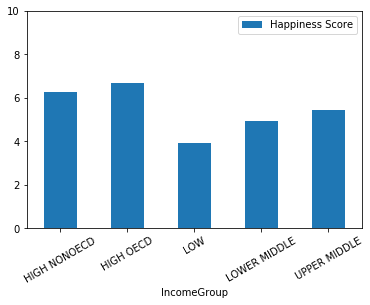

In [67]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))